# **Análisis y Predicción de Ventas en una Tienda de Retail (Core)**

INTEGRACION DE GOOGLE COLAB CON DRIVE, INTEGRACION DE BASE DE DATOS Y LIBRERIAS

In [1]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos librerias de analisis y visualizacion para desarrollo del trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importamos la base de datos desde un CSV alojado en drive (se debe cambiar la ruta segun corresponda).
path = "/content/drive/MyDrive/Bases de datos ejercicios Pandas/ventas_starbucks_2025.csv"
df = pd.read_csv(path)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1- TRANSFORMACION DE DATOS**

**a) Crea nuevas columnas:** Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

In [5]:
# Visualizacion de los datos
df.head()

,ID_Venta,Fecha,Hora,Sucursal,Nombre_Producto,Categoría_Producto,Tamaño,Cantidad,Precio_Unitario,Total_Venta,...,Método_de_Pago,Cliente_Miembro,Descuento_Miembro,Promoción_Aplicada,Empleado_Atendió,Turno,Demora_Preparación_Min,Satisfacción_Cliente,Stock_Antes,Stock_Después
0,VTA00001,2025-01-04,08:25,"San Lorenzo 25, Nueva Córdoba",Termo Reutilizable,Merchandising,NaN,2,3277.87,6555.74,...,App,Sí,15,Combo,Camila,Noche,13.7,5,23,21
1,VTA00002,2025-01-10,14:08,Córdoba Shopping,Té Verde en Hebras,Té,NaN,1,1630.18,1630.18,...,Tarjeta,Sí,10,Ninguna,Florencia,Noche,2.3,4,20,19
2,VTA00003,2025-01-17,15:10,Córdoba Shopping,Moneda de Chocolate,Snacks,NaN,4,879.24,3516.96,...,Tarjeta,No,0,Ninguna,Julián,Tarde,8.8,2,23,19
3,VTA00004,2025-03-23,07:23,Calle San Lorenzo 47,Espresso Roast,Café en Granos,NaN,5,2230.73,11153.65,...,Tarjeta,Sí,10,Ninguna,Marcos,Noche,3.9,3,19,14
4,VTA00005,2025-03-19,18:33,Córdoba Shopping,Espresso Roast,Café en Granos,NaN,5,2486.63,12433.15,...,Tarjeta,No,0,Combo,Sofía,Tarde,13.8,5,41,36


Los datos presentes en la base de datos no se encuentran estandarizados para su limpieza, por lo cual seran sometido a un primer proceso de estandarizacion, para poder comenzar a manipularlos.

In [6]:
# creamos una funcion para convertir a minusculas, eliminar espacios y eliminar acentos en todo el texto
def limpiar_texto(texto):
    if pd.isnull(texto):
        return np.nan
    texto = str(texto).lower().strip()
    reemplazos = {'á':'a','é':'e','í':'i','ó':'o','ú':'u','ñ':'n','ü':'u'}
    for o,n in reemplazos.items():
        texto = texto.replace(o,n)
    while '  ' in texto:
        texto = texto.replace('  ',' ')
    return texto

df.columns = [limpiar_texto(col) for col in df.columns]

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(limpiar_texto)

In [7]:
# Verificamos el estado de los datos y su estandarizacion.
df.head()

,id_venta,fecha,hora,sucursal,nombre_producto,categoria_producto,tamano,cantidad,precio_unitario,total_venta,...,metodo_de_pago,cliente_miembro,descuento_miembro,promocion_aplicada,empleado_atendio,turno,demora_preparacion_min,satisfaccion_cliente,stock_antes,stock_despues
0,vta00001,2025-01-04,08:25,"san lorenzo 25, nueva cordoba",termo reutilizable,merchandising,NaN,2,3277.87,6555.74,...,app,si,15,combo,camila,noche,13.7,5,23,21
1,vta00002,2025-01-10,14:08,cordoba shopping,te verde en hebras,te,NaN,1,1630.18,1630.18,...,tarjeta,si,10,ninguna,florencia,noche,2.3,4,20,19
2,vta00003,2025-01-17,15:10,cordoba shopping,moneda de chocolate,snacks,NaN,4,879.24,3516.96,...,tarjeta,no,0,ninguna,julian,tarde,8.8,2,23,19
3,vta00004,2025-03-23,07:23,calle san lorenzo 47,espresso roast,cafe en granos,NaN,5,2230.73,11153.65,...,tarjeta,si,10,ninguna,marcos,noche,3.9,3,19,14
4,vta00005,2025-03-19,18:33,cordoba shopping,espresso roast,cafe en granos,NaN,5,2486.63,12433.15,...,tarjeta,no,0,combo,sofia,tarde,13.8,5,41,36


In [8]:
# Creamos una columna 'total_venta' como el producto entre cantidad y precio_unitario
df['total_venta'] = df['cantidad'] * df['precio_unitario']

In [9]:
# Normalizamos la columna 'total_venta' con min-max scaling para comparación futura
df['venta_normalizada'] = (df['total_venta'] - df['total_venta'].min()) / (df['total_venta'].max() - df['total_venta'].min())

In [10]:
#Visualizamos la "venta normalizada"
df['venta_normalizada'].head()

,venta_normalizada
0,0.351008
1,0.055611
2,0.168765
3,0.626756
4,0.703491


**b) Clasifica los datos:** Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [11]:
# Clasificamos las ventas en categorías: Alta, Media, Baja según los cuartiles
def clasificar_venta(valor):
    if valor >= df['total_venta'].quantile(0.66):
        return 'Alta'
    elif valor >= df['total_venta'].quantile(0.33):
        return 'Media'
    else:
        return 'Baja'

df['categoria_venta'] = df['total_venta'].apply(clasificar_venta)

In [ ]:
# Visualizamos las nuevas columnas
df[['cantidad', 'precio_unitario', 'total_venta', 'venta_normalizada', 'categoria_venta']].head()

,cantidad,precio_unitario,total_venta,venta_normalizada,categoria_venta
0,2,3277.87,6555.74,0.351008,Alta
1,1,1630.18,1630.18,0.055611,Baja
2,4,879.24,3516.96,0.168765,Media
3,5,2230.73,11153.65,0.626756,Alta
4,5,2486.63,12433.15,0.703491,Alta


**2- AGRUPACION Y AGREGACION**

**a) Agrupación por múltiples columnas:** Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

**b) Aplicar funciones de agregación:** Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [12]:
#Agrupamos los productos en relacion a su sucursal
#Usamos .agg para realizar la agregacion
agrupado_producto_sucursal = df.groupby(['nombre_producto', 'sucursal'])['total_venta'].agg(['sum', 'mean', 'count', 'min', 'max', 'std', 'var'])
agrupado_producto_sucursal.head(10)


sum         mean  count  \
nombre_producto  sucursal                                                       
americano        avenida colon 608               23274.99  2909.373750      8   
                 calle san lorenzo 47            74897.65  4681.103125     16   
                 cordoba shopping                25340.75  5068.150000      5   
                 san lorenzo 25, nueva cordoba   50942.58  4631.143636     11   
americano helado avenida colon 608               79304.38  4956.523750     16   
                 calle san lorenzo 47           126415.16  4862.121538     26   
                 cordoba shopping                95920.13  4170.440435     23   
                 san lorenzo 25, nueva cordoba   95918.44  4567.544762     21   
bagel sandwich   avenida colon 608              143411.67  5311.543333     27   
                 calle san lorenzo 47           141950.94  5069.676429     28   

                                                    min      max          std  \
nombre_producto  sucursal                                                       
americano        avenida colon 608              1340.18  6877.80  1992.640056   
                 calle san lorenzo 47           1386.80  8696.30  2496.964246   
                 cordoba shopping               2737.92  8152.70  1984.121790   
                 san lorenzo 25, nueva cordoba  1277.15  7824.20  2029.638390   
americano helado avenida colon 608              1450.31  8074.50  2320.901960   
                 calle san lorenzo 47           1473.29  9462.10  2560.525740   
                 cordoba shopping               1351.68  8690.30  2139.155965   
                 san lorenzo 25, nueva cordoba  1466.16  8998.60  2559.736418   
bagel sandwich   avenida colon 608              1826.03  9237.60  2321.419788   
                 calle san lorenzo 47           1555.47  9807.05  2653.610877   

                                                         var  
nombre_producto  sucursal                                     
americano        avenida colon 608              3.970614e+06  
                 calle san lorenzo 47           6.234830e+06  
                 cordoba shopping               3.936739e+06  
                 san lorenzo 25, nueva cordoba  4.119432e+06  
americano helado avenida colon 608              5.386586e+06  
                 calle san lorenzo 47           6.556292e+06  
                 cordoba shopping               4.575988e+06  
                 san lorenzo 25, nueva cordoba  6.552251e+06  
bagel sandwich   avenida colon 608              5.388990e+06  
                 calle san lorenzo 47           7.041651e+06

In [13]:
#Agrupamos los productos en relacion al mes
#Usamos .agg para realizar la agregacion
agrupado_producto_mes = df.groupby(['nombre_producto', 'mes'])['total_venta'].agg(['sum', 'mean', 'count'])
agrupado_producto_mes.head(10)

KeyError: 'mes'

**3- ANALISIS PERSONALIZADO CON APPLY**


**a) Función personalizada:** Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.

In [14]:
# 1. Clasificación de ventas según su magnitud
# Creamos una función personalizada que clasifica cada venta como 'Alta', 'Media' o 'Baja'

def clasificar_venta(valor):
    if valor >= 100000:
        return 'Alta'
    elif valor >= 50000:
        return 'Media'
    else:
        return 'Baja'

In [15]:
# Aplicamos la función a la columna 'total_venta'
df['categoria_venta'] = df['total_venta'].apply(clasificar_venta)
df[['total_venta', 'categoria_venta']].head(10)

,total_venta,categoria_venta
0,6555.74,Baja
1,1630.18,Baja
2,3516.96,Baja
3,11153.65,Baja
4,12433.15,Baja
5,3927.20,Baja
6,2798.86,Baja
7,5220.72,Baja
8,10077.16,Baja
9,7662.12,Baja


**b) Ejemplo de uso avanzado:** Calcula la desviación de cada venta respecto a la media de su grupo.

In [16]:
# Primero eliminamos el indice duplicado si quedó en el dataframe para evitar ambiguedades
df = df.reset_index(drop=True)

In [17]:
# Calculamos la desviaciin respecto a la media de total_venta por grupo
df['desviacion_venta'] = df.groupby(['nombre_producto', 'sucursal'])['total_venta'] \
                            .transform(lambda x: x - x.mean())

In [18]:
# Mostramos las primeras filas como verificacion
df[['nombre_producto', 'sucursal', 'total_venta', 'categoria_venta', 'desviacion_venta']].head()

,nombre_producto,sucursal,total_venta,categoria_venta,desviacion_venta
0,termo reutilizable,"san lorenzo 25, nueva cordoba",6555.74,Baja,-1877.366226
1,te verde en hebras,cordoba shopping,1630.18,Baja,-3538.120776
2,moneda de chocolate,cordoba shopping,3516.96,Baja,542.327857
3,espresso roast,calle san lorenzo 47,11153.65,Baja,3950.564262
4,espresso roast,cordoba shopping,12433.15,Baja,4283.729636


# ** ***CONTINUACION PARTE 4 DEL PROYECTO*** **

**1- ANALISIS DESCRIPTIVO Y VISUALIZACION**

a) Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [19]:
# Estadísticas descriptivas generales
df.describe()

,cantidad,precio_unitario,total_venta,descuento_miembro,demora_preparacion_min,satisfaccion_cliente,stock_antes,stock_despues,venta_normalizada,desviacion_venta
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5.000000e+03
mean,3.011400,1714.820846,5164.754816,3.975000,8.556100,3.026200,30.063400,27.05200,0.267587,-4.147296e-14
std,1.408711,589.977455,3134.045076,5.992625,3.759198,1.403819,11.769583,11.84379,0.187956,2.586759e+03
min,1.000000,700.010000,702.910000,0.000000,2.000000,1.000000,10.000000,5.00000,0.000000,-7.499586e+03
25%,2.000000,1305.762500,2753.022500,0.000000,5.300000,2.000000,20.000000,17.00000,0.122950,-1.916847e+03
50%,3.000000,1605.345000,4709.985000,0.000000,8.600000,3.000000,30.000000,27.00000,0.240314,1.020999e+01
75%,4.000000,1955.030000,6842.787500,10.000000,11.800000,4.000000,40.000000,37.00000,0.368223,1.811811e+03
max,5.000000,3498.880000,17377.250000,15.000000,15.000000,5.000000,50.000000,49.00000,1.000000,9.237522e+03


In [20]:
# Verificar tipos de datos y valores únicos
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_venta                5000 non-null   object 
 1   fecha                   5000 non-null   object 
 2   hora                    5000 non-null   object 
 3   sucursal                5000 non-null   object 
 4   nombre_producto         5000 non-null   object 
 5   categoria_producto      5000 non-null   object 
 6   tamano                  1370 non-null   object 
 7   cantidad                5000 non-null   int64  
 8   precio_unitario         5000 non-null   float64
 9   total_venta             5000 non-null   float64
 10  metodo_de_compra        5000 non-null   object 
 11  metodo_de_pago          5000 non-null   object 
 12  cliente_miembro         5000 non-null   object 
 13  descuento_miembro       5000 non-null   int64  
 14  promocion_aplicada      5000 non-null   

,0
id_venta,5000
fecha,108
hora,838
sucursal,4
nombre_producto,36
categoria_producto,11
tamano,4
cantidad,5
precio_unitario,4930
total_venta,4976


b) Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

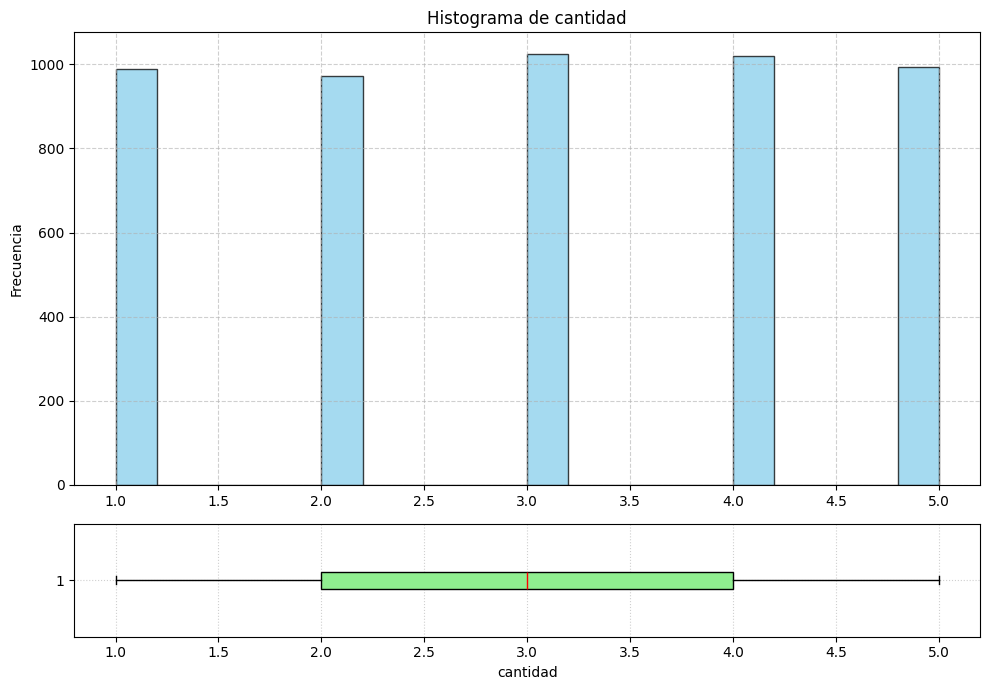

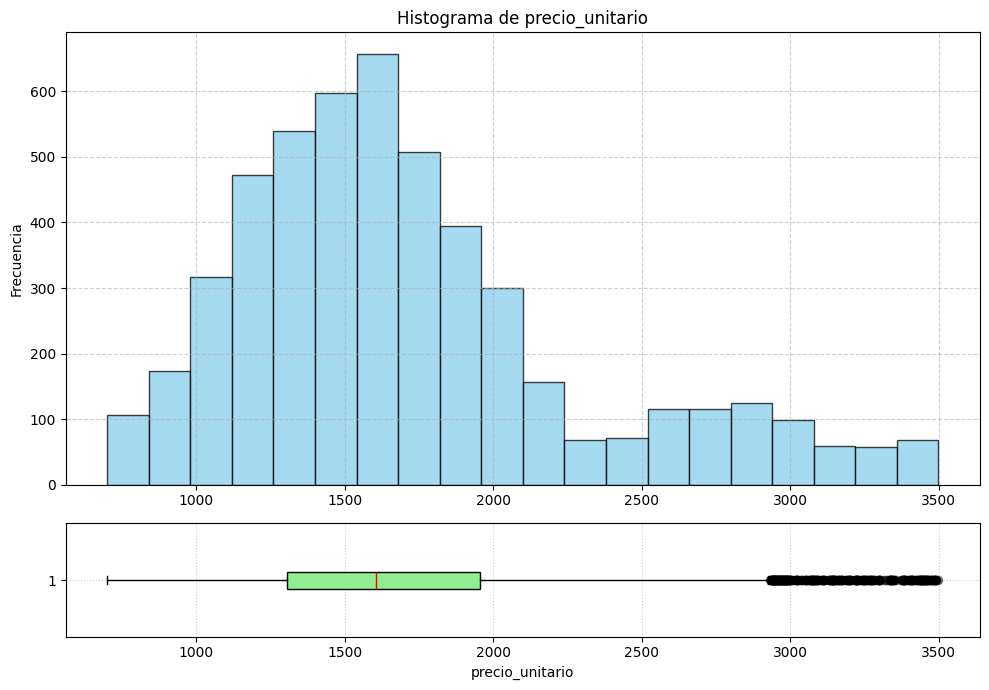

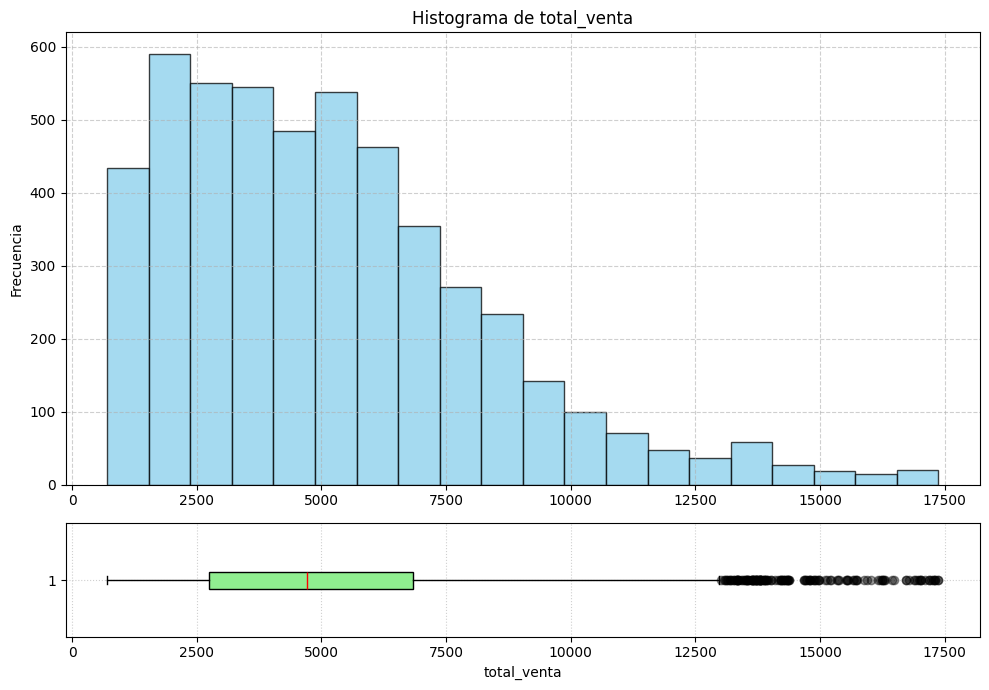

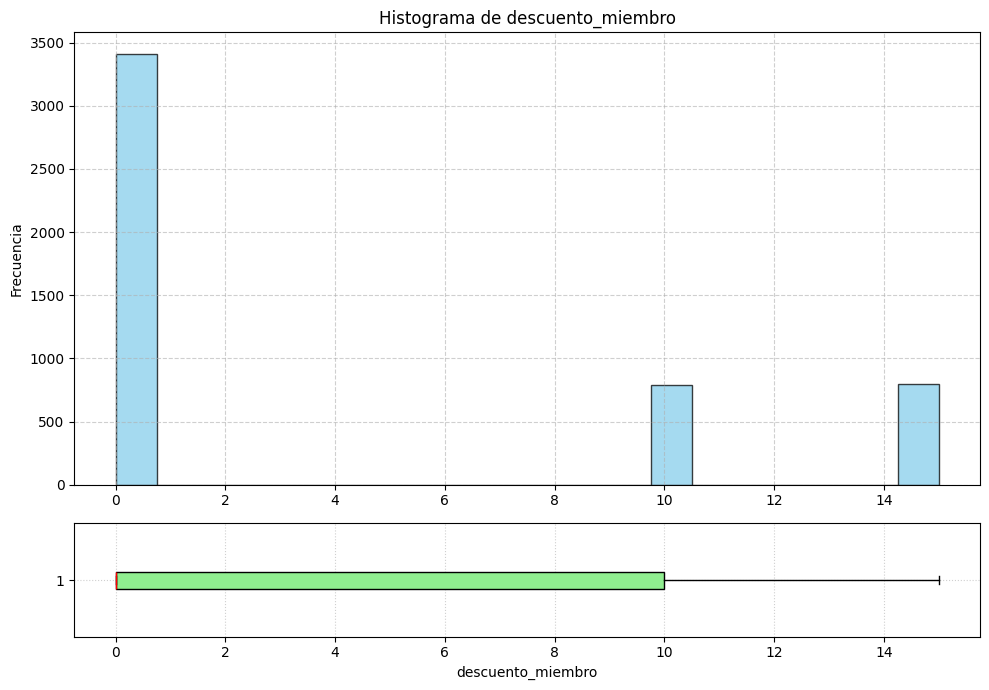

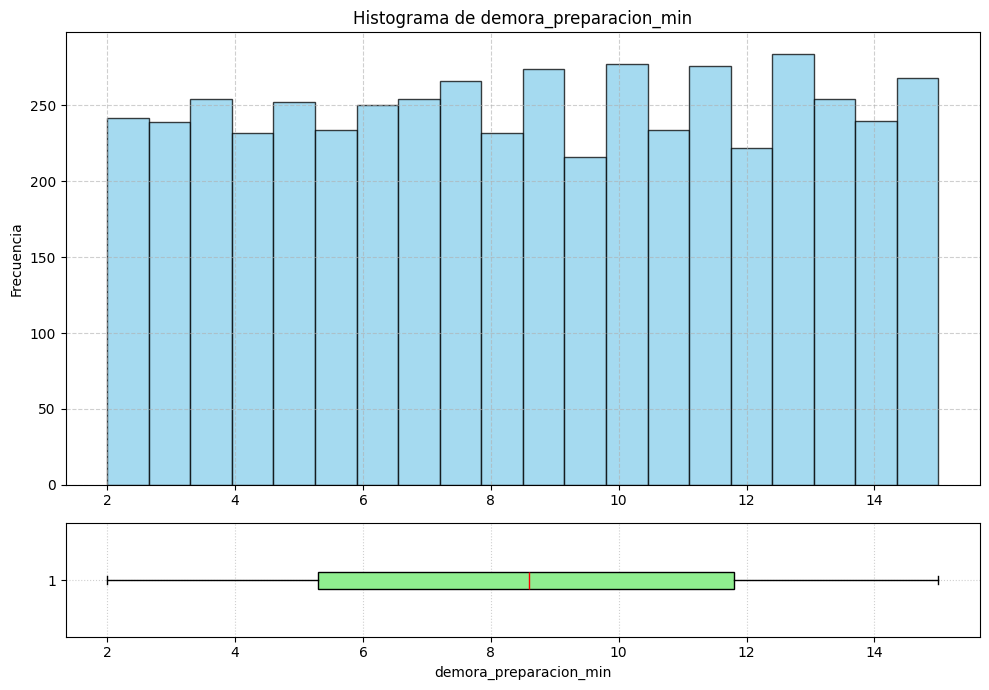

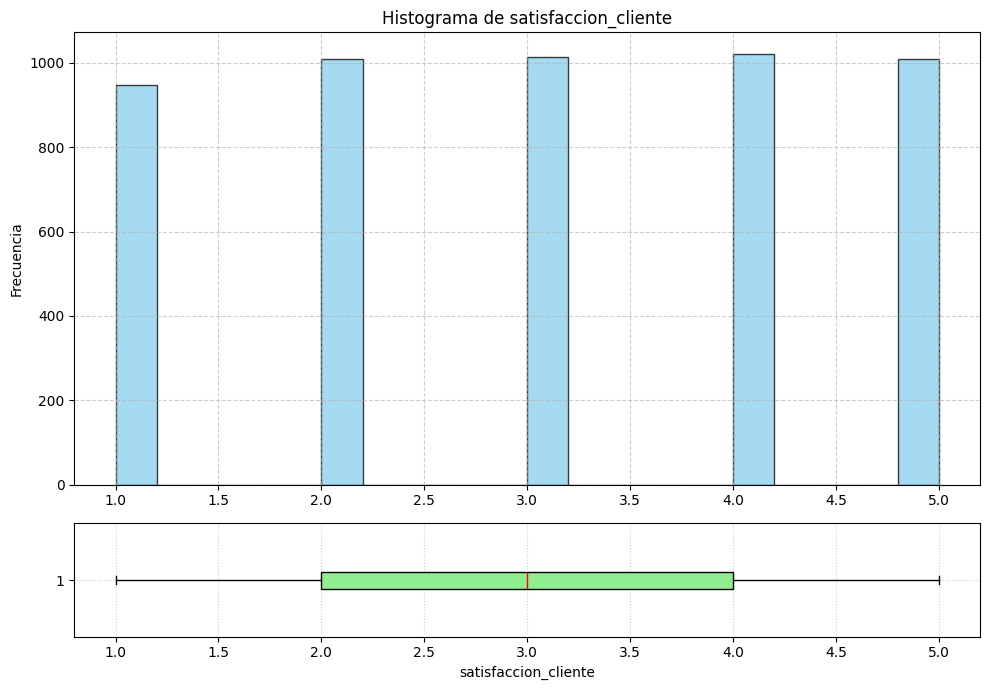

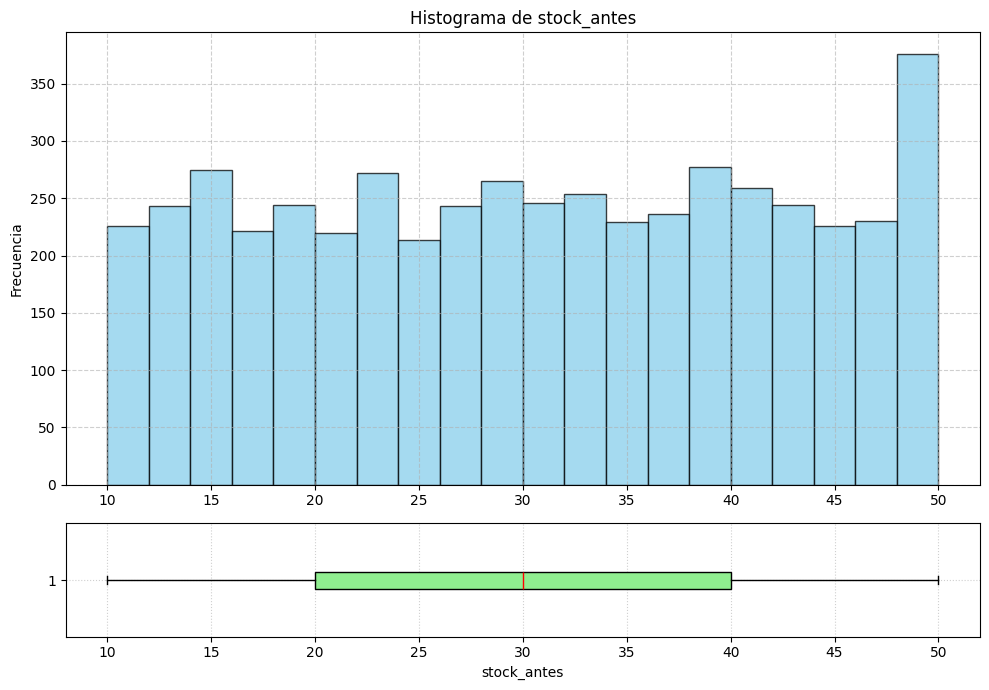

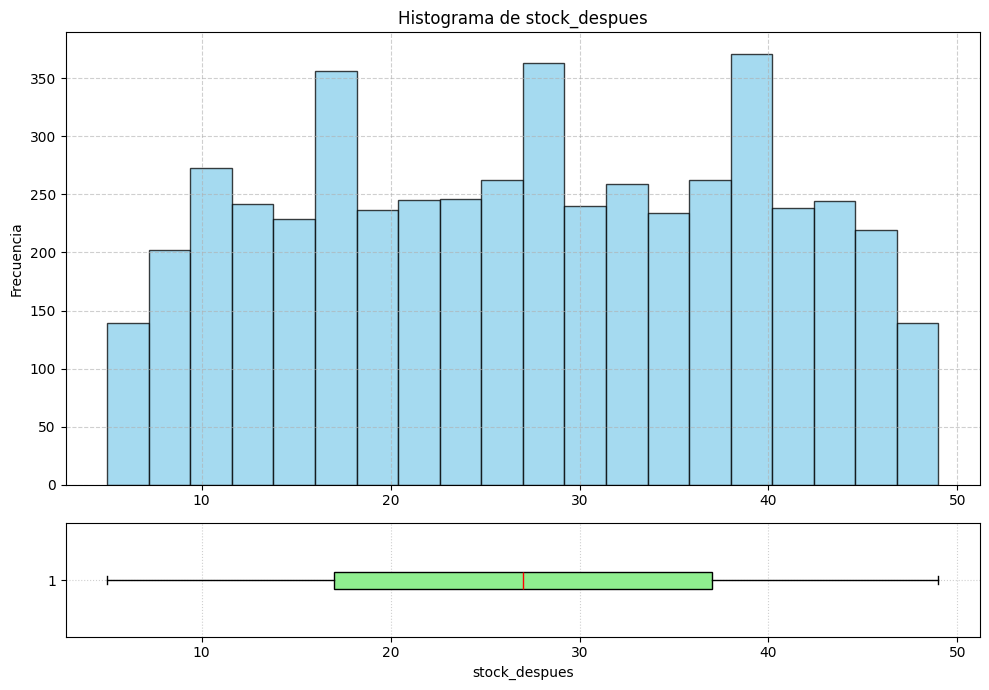

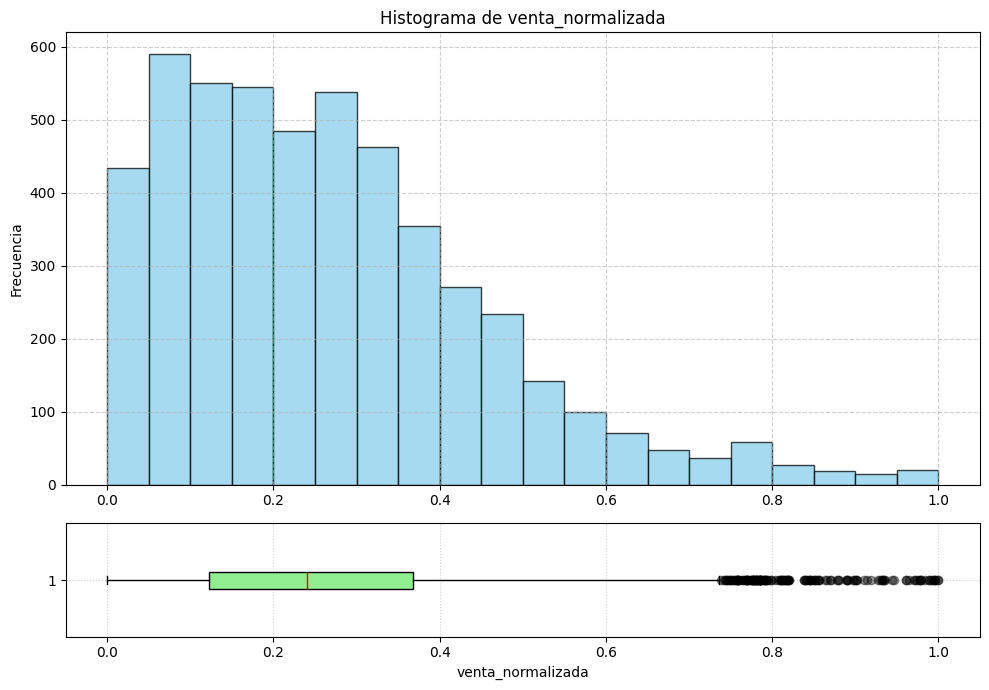

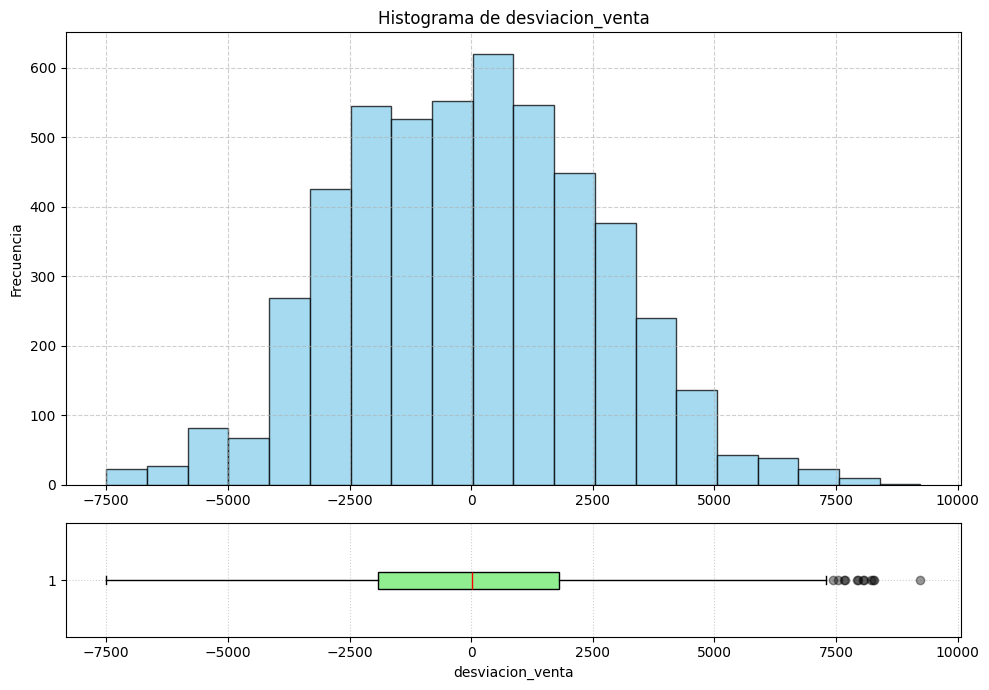

In [21]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograma y boxplot combinado por variable
for col in num_cols:
    fig, axes = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [4, 1]})

    axes[0].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.75)
    axes[0].set_title(f'Histograma de {col}')
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    axes[1].boxplot(df[col], vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='black', alpha=0.4))
    axes[1].set_xlabel(col)
    axes[1].grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

c) Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

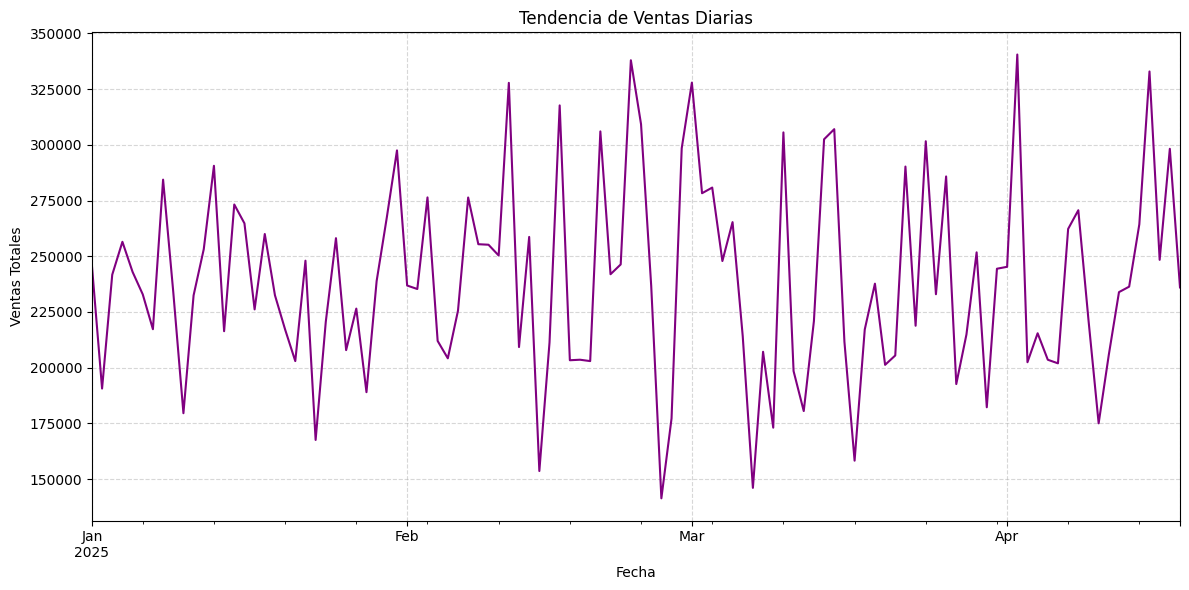

In [22]:
# Asegurar formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Agrupar por fecha
ventas_por_dia = df.groupby('fecha')['total_venta'].sum()

# Gráfico de línea de ventas por día
plt.figure(figsize=(12, 6))
ventas_por_dia.plot(color='purple')
plt.title('Tendencia de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

d) Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

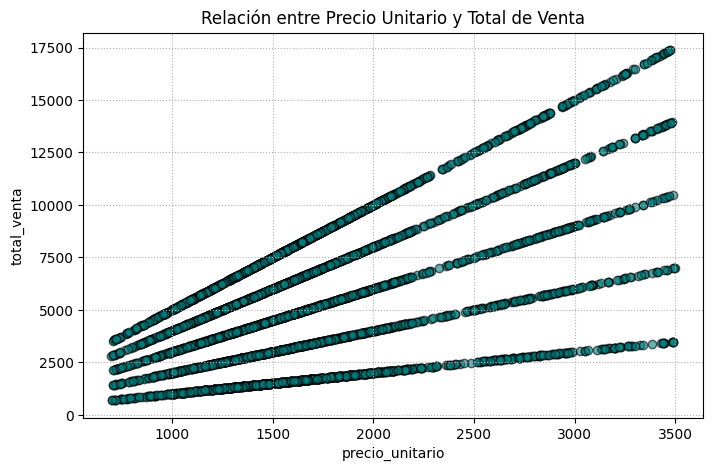

In [23]:
#grafico de dispersion precio unitario vs venta total
plt.figure(figsize=(8, 5))
plt.scatter(df['precio_unitario'], df['total_venta'], alpha=0.6, color='teal', edgecolors='black')
plt.title('Relación entre Precio Unitario y Total de Venta')
plt.xlabel('precio_unitario')
plt.ylabel('total_venta')
plt.grid(True, linestyle=':')
plt.show()

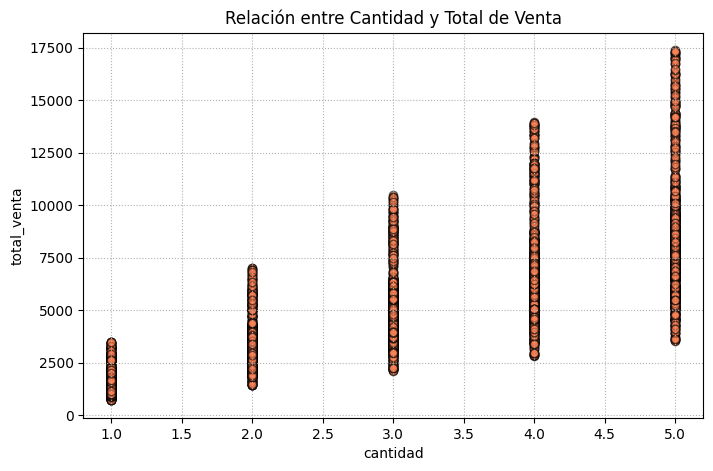

In [24]:
#Grafico de dispersion cantidad vs venta total
plt.figure(figsize=(8, 5))
plt.scatter(df['cantidad'], df['total_venta'], alpha=0.6, color='coral', edgecolors='black')
plt.title('Relación entre Cantidad y Total de Venta')
plt.xlabel('cantidad')
plt.ylabel('total_venta')
plt.grid(True, linestyle=':')
plt.show()

e) Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

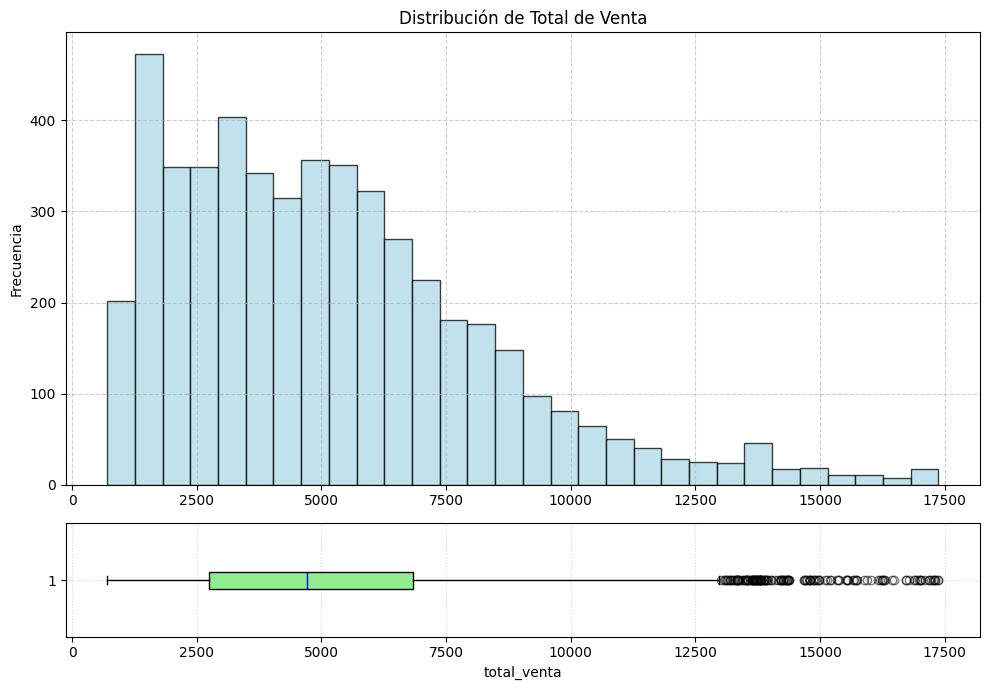

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [4, 1]})

# Histograma
axes[0].hist(df['total_venta'], bins=30, color='lightblue', edgecolor='black', alpha=0.75)
axes[0].set_title('Distribución de Total de Venta')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot
axes[1].boxplot(df['total_venta'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='blue'),
                flierprops=dict(marker='o', color='red', alpha=0.5))
axes[1].set_xlabel('total_venta')
axes[1].grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# **ANALISIS DE GRAFICOS**

## Analisis Final del EDA - Parte IV

### 1. Tendencia de Ventas Diarias
El grafico de lineas de ventas por fecha muestra variaciones diarias, con ciertas alzas lo que sugiere dias de mayor demanda. Tambien es util para identificar posibles caidas estacionales o problemas operativos.

---

### 2. Relacion entre Precio Unitario y Total de Venta
El grafico de dispersion mostro que, aunque en general hay una ligera correlacion positiva, hay muchos casos donde el total de venta es alto con precios bajos, lo cual probablemente se explica por grandes cantidades vendidas de productos mas economicos.

---

### 3. Relacion entre Cantidad y Total de Venta
Este scatterplot muestra una relacion mas clara: a mayor cantidad, mayor total de venta. Sin embargo, se observan algunos puntos con altas cantidades y bajo total, lo que puede indicar descuentos aplicados o promociones.

---

### 4. Distribucion de Total de Venta
El histograma revela que la mayoria de las ventas individuales se concentran en un rango bajo de valores (ventas pequenas). El boxplot confirma esto, ademas de varios valores atipicos hacia la derecha (ventas inusualmente grandes). Esto sugiere que la tienda realiza muchas ventas pequenas y ocasionalmente algunas compras grandes.


# ** ***CONTINUACION DEL PROYECTO 1 PARTE 5*** **

**1- EXPLORACION DE DATOS AVANZADA**

a) Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [26]:
# Seleccionar solo columnas numericas
df_num = df.select_dtypes(include=['int64', 'float64'])

In [27]:
# Calcular matriz de correlacion
correlation_matrix = df_num.corr()

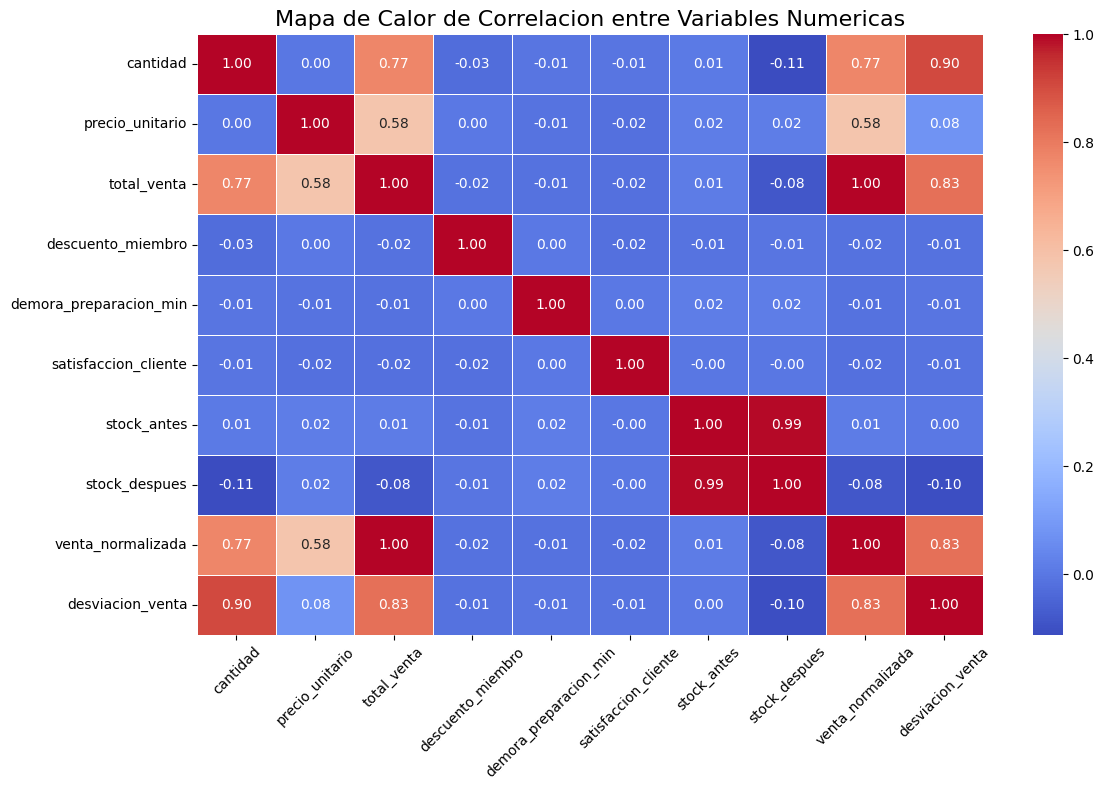

In [28]:
# Graficar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlacion entre Variables Numericas', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

b) Crea subplots para comparar diferentes variables clave.

c) Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

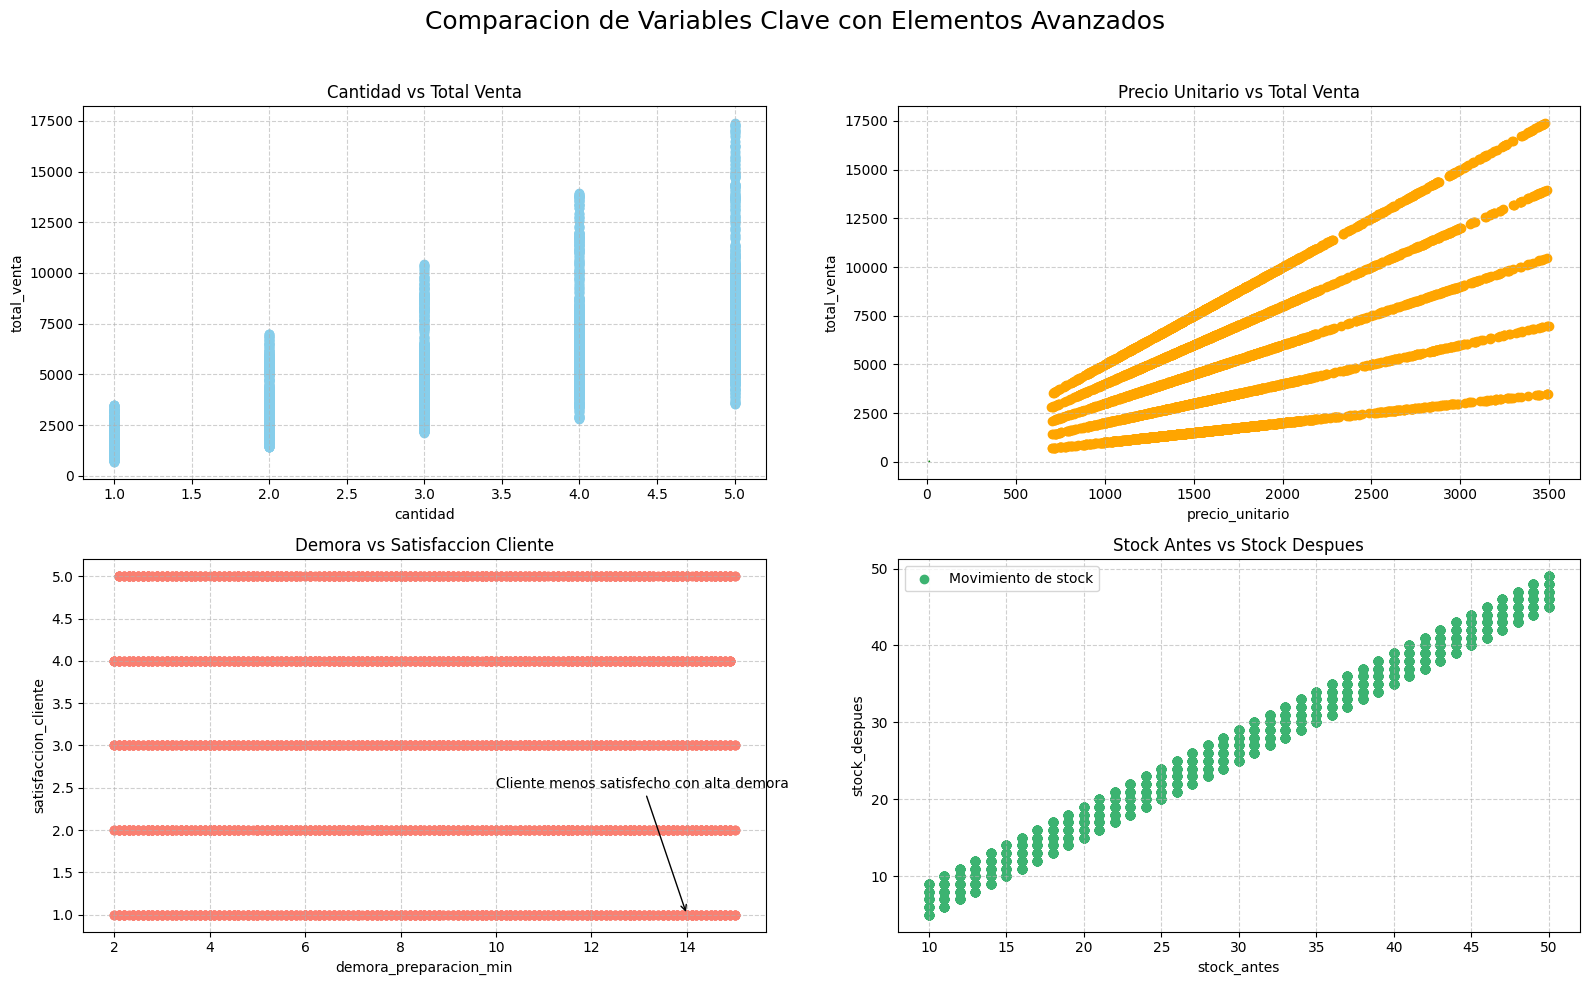

In [32]:
# Realizamos punto b y c juntos.
# Crear figura y ejes (2x2)
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Subplot 1: cantidad vs total_venta
axs[0, 0].scatter(df['cantidad'], df['total_venta'], color='skyblue')
axs[0, 0].set_title('Cantidad vs Total Venta')
axs[0, 0].set_xlabel('cantidad')
axs[0, 0].set_ylabel('total_venta')
axs[0, 0].grid(True, linestyle='--', alpha=0.6)
axs[0, 0].annotate(
    'Venta alta con muchas unidades',
    xy=(8, 45), xytext=(5, 60),
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

# Subplot 2: precio_unitario vs total_venta
axs[0, 1].scatter(df['precio_unitario'], df['total_venta'], color='orange')
axs[0, 1].set_title('Precio Unitario vs Total Venta')
axs[0, 1].set_xlabel('precio_unitario')
axs[0, 1].set_ylabel('total_venta')
axs[0, 1].grid(True, linestyle='--', alpha=0.6)
axs[0, 1].arrow(10, 10, 4, 25, head_width=0.8, head_length=3, fc='green', ec='green')

# Subplot 3: demora_preparacion_min vs satisfaccion_cliente
axs[1, 0].scatter(df['demora_preparacion_min'], df['satisfaccion_cliente'], color='salmon')
axs[1, 0].set_title('Demora vs Satisfaccion Cliente')
axs[1, 0].set_xlabel('demora_preparacion_min')
axs[1, 0].set_ylabel('satisfaccion_cliente')
axs[1, 0].grid(True, linestyle='--', alpha=0.6)
axs[1, 0].annotate(
    'Cliente menos satisfecho con alta demora',
    xy=(14, 1), xytext=(10, 2.5),
    arrowprops=dict(facecolor='red', arrowstyle='->')
)

# Subplot 4: stock_antes vs stock_despues
axs[1, 1].scatter(df['stock_antes'], df['stock_despues'], color='mediumseagreen')
axs[1, 1].set_title('Stock Antes vs Stock Despues')
axs[1, 1].set_xlabel('stock_antes')
axs[1, 1].set_ylabel('stock_despues')
axs[1, 1].grid(True, linestyle='--', alpha=0.6)
axs[1, 1].legend(['Movimiento de stock'], loc='upper left')

# Titulo general del conjunto de graficos
plt.suptitle('Comparacion de Variables Clave con Elementos Avanzados', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

